# Mock Data Exploration

Mock Process for data analysis and visualization

In [3]:
from pathlib import Path
import pandas as pd

file = Path("./resources/mock2.csv")
df = pd.read_csv(file, index_col=["patient_id"])
df

,gender,weight_kg,height_cm,city_origin,mother_age,father_age,apgar_min0,apgar_min5,heartrate_bpm,oxygen_saturation,number_of_surgeries
patient_id,,,,,,,,,,,
1,F,3.0,50,CDMX,35,39,8,9,110,97,1
2,M,2.0,54,Puebla,40,40,9,10,115,98,1
3,M,2.5,48,Toluca,28,29,7,9,120,96,2
4,F,2.8,45,CDMX,29,45,7,10,132,97,1
5,M,4.0,51,CDMX,25,39,7,9,121,75,3
6,M,3.7,50,Puebla,30,38,8,9,111,94,3
7,F,2.7,54,CDMX,39,28,8,10,115,99,2
8,F,3.8,53,CDMX,41,27,8,10,120,98,1
9,M,3.4,49,Toluca,27,46,8,9,110,90,1


In [4]:
most_surgeries = df.sort_values(by=["apgar_min0"], ascending=False)
ms_df = most_surgeries[["heartrate_bpm", "oxygen_saturation", "apgar_min0"]]
ms_df

,heartrate_bpm,oxygen_saturation,apgar_min0
patient_id,,,
2,115,98,9
1,110,97,8
6,111,94,8
7,115,99,8
8,120,98,8
9,110,90,8
3,120,96,7
4,132,97,7
5,121,75,7


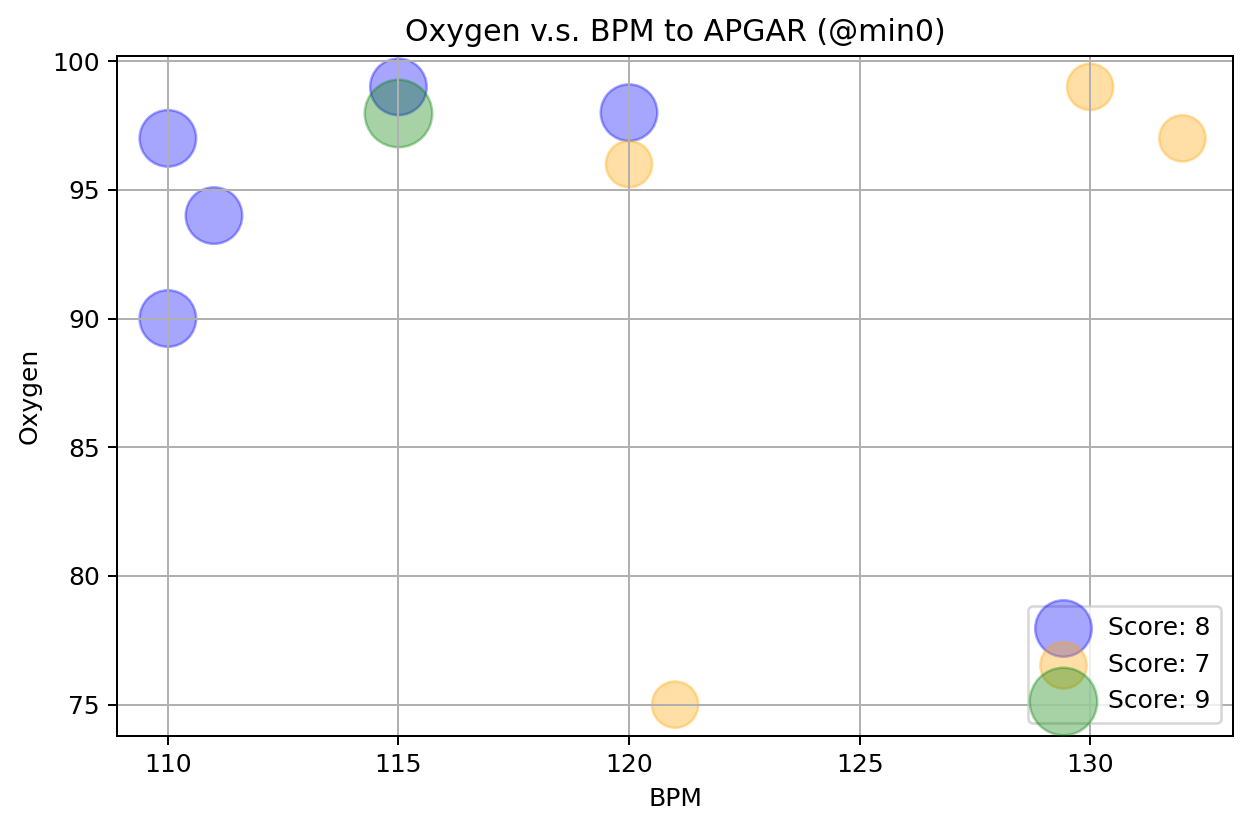

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5), dpi=180, facecolor="white")
apgards = ms_df["apgar_min0"].value_counts().index

for ap, color in zip(apgards, ("blue", "orange", "green")):
    data: pd.DataFrame = ms_df[ms_df["apgar_min0"] == ap]
    ax.scatter(
        data["heartrate_bpm"], 
        data["oxygen_saturation"], 
        c=color,
        label=f"Score: {ap}",
        s=data["apgar_min0"].map(lambda x: x**3),
        alpha=0.35,
    )
ax.legend(loc="lower right")
ax.grid(True)
plt.title("Oxygen v.s. BPM to APGAR (@min0)")
ax.set_ylabel("Oxygen")
ax.set_xlabel("BPM")
fig.savefig(
    "./resources/OxygenBPM_APGARmin0.png",
    transparent=False
)